## [LH 주차수요 예측](https://dacon.io/competitions/official/235745/overview/description)

In [ ]:
import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

## Data 수가 매우 적음 (3000 rows) -> Deep learning보다는 Tree-based ML로 국한

- optimization에서 많이 신경쓰는게 좋을 듯 (bayesian 등등)
- preprocessing (discretization, normalization,,,) 신경쓸 것



In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/train.csv")
test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/test.csv")
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

- 전용 면적 & 공가수 & 임대료 등 몇 개는 discretization 필요해보임.
- '도보 10분거리 내 버스정류장 수'는 일정 수 넘어가면 # of data 급락 -> 'N 이상'이라는 column으로 묶는 것도 나쁘진 않은 듯



In [ ]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [ ]:
train['도보 10분거리 내 버스정류장 수'].value_counts()

2.0     780
3.0     776
4.0     493
1.0     270
5.0     164
6.0     156
8.0      99
10.0     80
7.0      65
12.0     22
20.0     15
15.0     11
16.0      6
19.0      4
11.0      3
14.0      2
0.0       2
Name: 도보 10분거리 내 버스정류장 수, dtype: int64


# Simple EDAs

In [ ]:
from matplotlib import pyplot as plt
plt.show()

In [ ]:
# train['도보 10분거리 내 버스정류장 수'].value_counts()
O = train[train.columns[0]].value_counts().sort_index()

In [ ]:
list(O.index)

['C1000',
 'C1004',
 'C1005',
 'C1013',
 'C1014',
 'C1015',
 'C1017',
 'C1022',
 'C1024',
 'C1026',
 'C1027',
 'C1032',
 'C1036',
 'C1039',
 'C1045',
 'C1046',
 'C1048',
 'C1049',
 'C1056',
 'C1057',
 'C1059',
 'C1065',
 'C1068',
 'C1077',
 'C1084',
 'C1085',
 'C1089',
 'C1095',
 'C1102',
 'C1103',
 'C1109',
 'C1122',
 'C1129',
 'C1131',
 'C1133',
 'C1136',
 'C1141',
 'C1143',
 'C1155',
 'C1156',
 'C1163',
 'C1171',
 'C1173',
 'C1175',
 'C1176',
 'C1177',
 'C1180',
 'C1184',
 'C1194',
 'C1206',
 'C1207',
 'C1210',
 'C1213',
 'C1218',
 'C1227',
 'C1234',
 'C1236',
 'C1244',
 'C1258',
 'C1263',
 'C1268',
 'C1269',
 'C1281',
 'C1284',
 'C1286',
 'C1301',
 'C1307',
 'C1309',
 'C1310',
 'C1312',
 'C1316',
 'C1319',
 'C1320',
 'C1326',
 'C1328',
 'C1329',
 'C1338',
 'C1340',
 'C1341',
 'C1343',
 'C1344',
 'C1350',
 'C1357',
 'C1360',
 'C1363',
 'C1365',
 'C1368',
 'C1375',
 'C1379',
 'C1386',
 'C1394',
 'C1397',
 'C1402',
 'C1406',
 'C1407',
 'C1410',
 'C1424',
 'C1426',
 'C1428',
 'C1430',


In [ ]:
import matplotlib
import matplotlib.font_manager

[f.fname for f in matplotlib.font_manager.fontManager.ttflist]

['/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBol.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf',
 '/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThr

In [ ]:
[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

[]

https://github.com/AhnJunYeong0319/AdvancedPython/blob/master/ChallengingProject/(JunYeong%20Ahn)Challenging%20Project.ipynb

In [ ]:
import numpy as np

def draw_EDAs(sub):
  cnt = 0
  fig, ax = plt.subplots((sub), 1, figsize=(8,7*sub))
  plt.rcParams['font.family'] = 'NanumMyeongjo'
  for i in range(sub):

    SERIES = train[train.columns[i]].value_counts().sort_index()

    # ax[i].rcParams["font.family"] = 'NanumMyeongjo'
    ax[i].bar( np.arange(len(list(SERIES.index))), SERIES )
    ax[i].set_xticks( np.arange(len(list(SERIES.index))), list(SERIES.index))
    ax[i].set_xlabel('β', fontsize = 15)
    ax[i].set_ylabel('α', fontsize = 15)
    ax[i].set_title(train.columns[i])


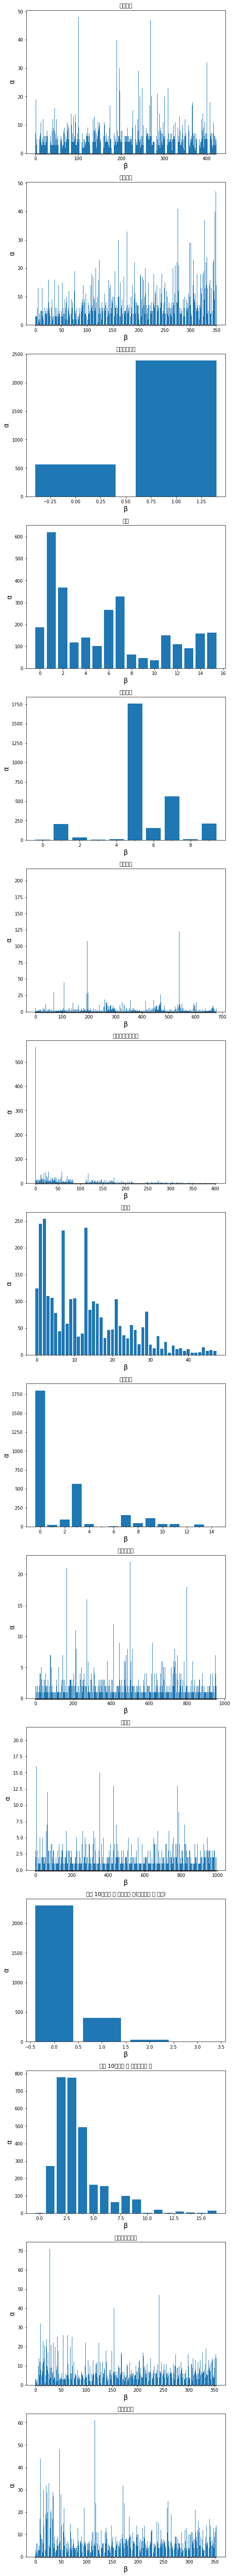

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

draw_EDAs(len(train.columns))